In [1]:
# En primer lugar, importamos las librerías necesarias:
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Reviews de usuarios:

Las reviews de los usuarios de Yelp se encuentran alojadas en un archivo JSON de gran tamaño, por lo que se realiza su apertura en partes o "chunks" para luego cargar en 2 diferentes dataframes:

In [2]:
# Se determina la cantidad de datos por porción:
chunk_size = 50000
# Se carga la info en un dataframe de pandas 
chunks = pd.read_json("Datasets/review-001.json", lines=True, chunksize=chunk_size)

# Se crea una lista vacía donde se almacenarán los distintos dataframes
dfs = []
for chunk in chunks:
    dfs.append(chunk)

# Se define el punto de corte para separar al dataframe en 2:
corte = int(len(dfs)/2)

### Parte 1

In [3]:
# Se define la primera mitad del dataframe:
dfs1 = dfs[:corte]
df_reviews1 = pd.concat(dfs1, axis=0, ignore_index=True)

In [4]:
# Se controla la info general del dataset:
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500000 entries, 0 to 3499999
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 240.3+ MB


In [5]:
# Se controla la cantidad de valores nulos:
df_reviews1.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [9]:
# Se controla la cantidad de valores duplicados:
df_reviews1.duplicated().sum()

0

Se filtran las reviews de los "busines_id" de restaurantes latinoamericanos:

In [6]:
# Se define una lista con todos los id de restaurantes latinoamericanos:
latin_business_id = ['VeFfrEZ4iWaecrQg6Eq4cg', 'UX3eq0WsVva-cqlVrzyzFg',
       'YhQAQhG1IkXJH7oLZMbM9w', 'RCguFZat10TcbDMeeeM3IQ',
       'zJFs_-Qtw7fzAsrQvA3Ltw', 'JYDd5sgn18DqDnTnq_tBRQ',
       'k9A4tAmei12tLprkrNPkcg', '1FURjeGJi_LBXcJQg8eskw',
       'rSe2uJ54OG3ytfTBIzW8Nw', 'w18LqIckdMOK7-PU49KBsQ',
       'GEGTsaKaO1R9fFB4sGS5qw', 'Qi-A4ZgcEuSnq_8Fpfo_3Q',
       'Wy8Hswf2cLQGRZN6armkag', 'sGLDJ4V4ezZZemFHCa0z_g',
       'HQmvpld1zlz-Q1ym8pRWAw', 'lOX7LiFDr4FEUZX5AWjXag',
       'WR3EvRMn2M5JzXzeAgjdMQ', 'jfIWqMrdWnPNORcDnQ7VNg',
       '6kPHr6gZaU9732ptn9gJrA', 'tr366vgAkbcpJBVKSdBxZg',
       'uO39--k_hrCFgZh-Bl8m8A', 'W8Z4rXYkmZlEVSaxIVjyvg',
       'bKgyXSQUGA8IHGt8ne5NuA', 'vyyr3G874jpRYSQo2KPZow',
       'ygZyTUWS4dbVL8d6vAiN4A', 'T_3a0PL3DWpn6HupP87UXQ',
       'xuRMyMcjVT0PXdGwJ7weoQ', 'Ifw5wqcChnL4zBigtR7NKA',
       'e66EsIDcYISTRTtr3X4Nsw', '0GsYSmfpsUpnTnxYbH045A',
       'kDo_9xc1PLlwgY_98qfi4w', 'CPPOKMjjE3-au0BWdbC95Q',
       'i8d8SAkHHi1t9qvu6BLvVQ', '6mnotS2bl54IN7ofeoJqgQ',
       'ZU9RrYZxqZufw0ya_HRqJw', 'haQDlvoWQA1wTTkdcuWWTw',
       'YCHBSWYErsKAI9AXeoPxhQ', 'SB0OKzWC1u5j-eE5jA_s7w',
       'GOpozpcZTnsYrDmyR4aCYw', 'Y87bVaGb0WU9PIHN1S-AWA',
       'NnAfFmqKH3PBeigmuAeFNA', 'jZncFsMQdrq268OHq_Q6uw',
       '29fX9PdevQa5LZavVDJsbw', 'Pn6DJKn5eJjZaxDGj8GCCg',
       '6TciI6uBdrd8z1av1YleLg', 'g82DuEDwnMrUQa7eSpGzAA',
       'tS47dXDlx9t-6B_F56cKUA', 'FwR7yomHU8D38q_CDtxjjw',
       'JxC9SCQF4aS2lHhRNkKjsQ', 'g5J9OJ5e8SgLYd2DL8_K9w',
       'onLwomlGswMhhmOEAeAVEg', 'DRjFU65k6Iu4tfDZuDkc2A',
       '78Zltl955e25PzcLfA4uNQ', '3Sb8JA3-URa4ElbRjAhkgQ',
       'PNVbv2kyUIHeJTDPis2gRg', 'EtM079Cj7-B3G7jPsGYb_Q',
       'mMKfNTiHHzZe7eAwJcX9ng', 'nVH5s77APFZwabAg7g3xTw',
       'R6vMJHcZLYYLdYUhPEYvPw', 'jfW3_wYOj09pCOHJQB74_w',
       'BaWVwChTW_MqkKru_WZp3g', 'yIwyHB7OfGl8pyQ3BXwWZg',
       'uAev1kjwzm9_XJqk_CollQ', '2IlpNSW0oHFyedaWCt5eJg',
       'lu2UpRHLBZfvLG_caNEHKQ', '7kLn2XsFwyJ-yFn4qx40TQ',
       '6RBZfirnzE4NahJTn1UPNA', 'Q54wPRfbmO8egJeVTmSkYQ',
       'J3Jnm1G1h6tBxsgjU9fqxQ', 'h_6ioAoKNLi01kPhoGDArg',
       'lbTRwl7ZwrgQ7PQtR6hV3g', 'cbX2XHrun39yJBND451_oA',
       'rwd4rGpYxiCXvgMV49sYAw', 'fkLNFt-UQkcCxdt_PBHelA',
       'hT5UJB4LmoB6MTeDZIi1BA', 'S9WG-ZBwLVj2eCB6_0P0MQ',
       'CUWituEeIX3xA0xU7X82Ow', 'YGgGefpPTFhgthvQvMAGoQ',
       'ZYqNIWch6Ik9wLZCa1hxkw', 'okc-iCgWvKGa1DfQSOh1Ig',
       '4s7cFr4U7J7eYnwa3Suzfw', 'vbH8RTnw5UD6m3lFV-NeJQ',
       'RKuAfE06rDcetvOTI5MbbA', 'FE5R_F7svUphKeUWuxA0JA',
       'zJpZ-uQ_F0XVgK1u98uWSg', 'JZrspVMm79n_iHTYftkI0g',
       'KSGNi_Fjd2wfj-M_XV7s5Q', 'dKuyGAWF7ghBLbZAZIBC3Q',
       'zBfYuwdybeMHfLuUbO1Ung', 'I0ueofqd_oBxaHWKSjCpMQ',
       'V5vBQ_LyE99i4EcfjAtyVw', 'Un-UDVOuv1co3TMmGaumxA',
       '2OJqIloZMAZXCW3uzF8jJw', 'Bc3C4rM1TVZTJzKEN6REtQ',
       'tc_nZBQ46584iOXQgdlBtg', 'IDyJPdJ-zTXJ_FSSOMOgbg',
       'kMWnmOpMoUk-ZSBtHuHnUg', 'IJ3Zy4pqsUw_HjjFm0iL_w',
       'KTR4RAO6WsQBKferwFXbAA', 'nYPzsOjvida-ne7swSPHpA',
       '9ugpNKKhnYRa51qXoxUw_A', 'axBd0qwqV-V0DCVVGpsNmQ',
       'v6VojlJI0E70pAArNYmGpA', 'eTMJNDgD-uWvrLDcoED7JA',
       'EyUo5RuibQLANooRVb2V1g', 'Kinh3GIoiJvBMaSsZJFRLQ',
       '4RLS-xn9hHxm8-HTLXf8Og', 'xqq6XPOWaTAaZQjX6O1-CA',
       'Cm8kELxjGucOpNkzMq7UHg', 'XG-TaijaXQGFpuTZmnt2LA',
       'fcT7GsBZCm8HSibz6hRKhQ', '-pjWlAzv4qRxB3Gu1D4t6A',
       'WSTHt05P3StKotZm1T5MzQ', 'd0ybsdCs9S9DTDTxuwLbKg',
       '3MgLckfXtG00QOyMpP4S-A', 'vbA_gS6GPzwMOx0TRoh-MA',
       '8wktEb-euuXOi4fq1K4uGQ', 'JYVqfn8xRNIb-VFvsm-W2Q',
       'YbE-dvcWOgTGPbvkYxr9XA', 'j3Ml_qEFnDOaH5miNzG6xw',
       'Pkeen6G8FdgFyyE6VpZKoA', 'CfxaspC1y3xfmL_AnA-7MQ',
       '4_DxnK_mefQ5KL5DF3MkJQ', 'UNTvAs-ObWrBXoxmO6qTwA',
       'CkENBnSJFfPA1hY0qrqfCg', 'qP2-g2yWDgEsGNeI_vdJwg',
       '3CdKup6WUOQI3LmOH7PhdA', 'IZJacI6XEUxy3_wbW76Qfw',
       'PteL1rKpMHqoUG2huz7xtw', 'YHOr_9eSbIGhcecc4Uow6Q',
       'e3oGqhgwyX4uCF8Fxb2RgQ', 'Ih6qAkEQRgk6zsaGTz5HUQ',
       'CSZmpx5iQsXAl7Pkt4WNlw', 'w5hnyKz_DpIB4qp9JSDH_g',
       'WAFpImG-SsFcZ96ILCopYg', 'x73A12BrNcRTvctBZWpXyA',
       'A263bVzMdU_-TIMhewOrjQ', 'N2n_nuiXb64ak0BNvIYEcQ',
       'SOKZiTA5hhGGsAuAIcAAPQ', 'd5jha0HH4SpUFnWpOMSoog',
       'm1sOcBwZNfAT2aHXgHFFtQ', 'fHUAs1ec568wu-a_mRq7Rw',
       'e8IBUW8tO5XlmgD4fSMtqA', 'bUlmX5ehFcy7vzli2tbaMw',
       '0ZcYZNGb85gscHglo04qSA', 'c0p9TawJSQHchy5aL8NWgQ',
       'F-NlTcl5BHb07E7TFb2TJw', 'SBrSBlFNRBN0bYI0xz56CQ',
       '-ALqLSTzkGDMscHdxA1NgA', 'b1shfPbHpkeWtbGbz5iAtg',
       'wvD7TOuE-qUhkyXoi8K8hA', 'l_slvEnh4v3W8BXF1gYlcQ',
       'DxnbnDc2Bww20e2DBrc4Qw', 'eBxc95u_Gcs9bLST0UntOQ',
       '2mdPuMX7lAh10EddfKetkQ', 'EWrHA28WLVpuuoktc0IqYA',
       '0ac5lGA_0wdKDnib3y59Xg', '5drbv3fz5FTvp_Z3d3aPSQ',
       'Pf_7rI6TnV8M_btOBBLg5w', '5tkZfqkwx6axbN9P5UlC8w',
       'TZ1CdCL9b2QKoxI5z7RaBA', 'O8rIa0Wvapju2iC9T1Hp8Q',
       '2_G-F1j0pyhGkC6zlV1dKg', 'mVSwg_lB45y2dDNknx2-Dg',
       '2MWEEuY3dtD2DNP99sNe_A', 'F88yRsOo9Eqo-0oxs8U1OQ',
       'UEOclIj9IgGqsDWv0cAkTA', 'SMJkOa60d1fmAyNWeSPfOg',
       'Hj5K3FMO8DoG7x8XALgISg', 'bYum3qt9iFUZijnDeFQCYw',
       'TtUjKI-C8wFeoEwTApPi-g', 'CEvOc7jNLqEGVdCzNWO2xw',
       '2Qfh6SO3pikeGUJyv4B5RA', 'MwJsk91FJ73YzzmpVaJihQ',
       'LlGIlNJE2Nv_PXkH7l4Wmg', 'Wx2G_Vbly6uHK4kuAeEg6A',
       'DqVpNtgFCP47n6frh-LREA', 'pKSB4wXLiS8rd1cAEgD8oA',
       'NJvh3pLAPYGFvk6qBKVg3g', 'ia8qPXo69K4kS4_gV_pI6w',
       'sP_TWRfpjgQc4mMz8ZwB3A', 'UO-QrBeJYDiIfGm5oZgL2g',
       'h8DlM-VbvCNzpsTqihgUAw', '-t29rrypP0eQdTeQ3YErdg',
       'f3eve2cxUIzyanWnHdMtFQ', 'R9LZdaXd-PZIV2kjkGNk4w',
       'Hng1aV3UUJEtqwr_hGxciA', 'CV6Jn7-_7OiIVjZLmPz95g',
       'jWgZRpdHy8csA1sUz1auSw', 'W7zCBDLFv13fDzRXJefrrA',
       'Myi13DxTqAfilYMerl9CPQ', '4VW4_ghjdYw0Wl40Voa9cw',
       'fcIYBxkw9pi8J1jE-Bc1QQ', 'tf6S06LD09IFDHUpOPqPaw',
       'D_WS8rM-DVygaCKbIErZ6Q', 'CaQNvsHVpWuDWTyHVyuU_Q',
       '7qO-JzbR_0TsQLKEnjPFkg', '-NXRuUsazxXZZ_OHwmtYtw',
       'sk0IM8koYo1o9-k_rpkmxQ', 'v4vL6XCqJHkxTDTS8HmgKQ',
       'YXKot5TH9MhC4khAn0JC3w', '_Q0ZBYz9eokL20qGTyfxxQ',
       'JLV6DlY2_86blXAgQ8LG9w', '-Q5QwYaQmg_AQ6N6yUk4Pg',
       'wNT5VL1LZHz6KIAy5dUN4Q', 'kAbNkppZFbfNyDE3lHRgww',
       'FGbflqBM97jbFhu-9qD9ww', 'jFn5pbJySxsPk0kaZfw5ig',
       'uihNp1cyWmHkma4U0MJHow', 'vj6AetpADpHOYtMRZsXX3g',
       'jfZqwEGa0uqG4WjkYQhF8g', 'TebJaTyTkScemRVHZUAPoA',
       '1GyeTrz-OR_ygxyT8Gzk_w', 'AFZTm786brtTbEc5yYBgfA',
       'NIqFlHurHm0cj6QXczYbEQ', 'bqAwBg211dfN4cCb7NRpsQ',
       'C0swiSrrDqxST42xF10nsA', '7n5ouW5hF4JTN1O3tvEGMA',
       'B4BimyYn9-uBBDcx3wIebg', 'PilMA5jBSjfh2rlCLG50Cw',
       'zhg9prrh_mc-mH5m1Vw7iw', 'Shp9xxBbDyTR6__nVh4XQA',
       'x2WLaFlWmF8RoC4ZRTUU6g', 'ICSLQrp1gPPNGkwUeUAAtg',
       'VqcHpG3ODZ4KHBhbxcL4-Q', 'apQiHqR6V7qFWOfFXV1FuA',
       'S2HrD4JYvv3HaRnDMdQlSw', 'jmtDnQIeTgkjbGgazIJxFw',
       'lZZogy-J9tDSFp4jMqVUHw', 'vi5xjfEhV6rnXrC_GbdhnA',
       '92Z2WFvC86Qy3TOI-oBGVg', 'cRvoGf7krkQKF85UvOQo_A',
       'sphMtkeFB-CLkPpJrpsFCA', 'nQWPadbkHFU-K6C4rhNRlA',
       '2Y0L3Hf6U-76jGvviKy5pA', '_vLfidpLDYHfZ_KnFZ75Lg',
       'UBIG1I0th2sSLekfXo-7jA', '3I-jEV_Iuz_tFpgCqL3sGw',
       'RRGLss4hhvZZuR0N6GQlSw', 'aNVHwcunSE7aPSc4AKRy6w',
       'm4kvY0viCwxqRtgOycnKVQ', 'cCD0ad9z0ZJjHLZsH8bfRQ',
       'Ak4vFqHZUWU5KXONRnuieQ', 'lm2ZtQMo_CjTI4LFcxsDfA',
       '2h3SEwpI6fiuTF9mcN1S_Q', 'lWnqWDfcISTHnL973Uwplg',
       '5H8WYKx5hayYr9e88w5uug', '8ALvS0Fjq1qTJVqVRGgRuw',
       'zlVXs63KhHXx7n-vnhyITw', 'xkU1aCQVrAmomsjJCc1QpQ',
       '4FdsX3MbkcdBRAr1aymF6A', 'cuVZh35VKHs6GNlACFlhvw',
       'N12Pwub9Tj-5AhuPfbj-Mg', 'qdCGZDlBuetCWcV9rrU05Q',
       '9bh2bRGo_FQZmZciQHqYJw', 'VCwxG-i9zG7u3ahqBoT1wA',
       'KPIlgtsj0cTkrXQLCsQe3Q', 's7bEswkllzEcwUug3QSq7A',
       'PrJEYGjlhaF0BSZk_Q-uPg', 'd35qSICZEJDIuGUIUIbkgw',
       '-9r8nAzWyRSLxBWt8uQOdA', 'lTM5zlSLwTO1glMBM_6-pw',
       '0dtk2LY38O1Xw1X3P3JDCA', 'k6Ptrc94R-Mk549pDEVTFA',
       'F0XEnuOCjrofiy_sZ2DHfg', 'bRlpi6k7wTSHHEapcLz_KA',
       '6RBrYMiAf8jFJI4fDoQpcw', 'beZDxtr75KdlsQm4_kezng',
       '2QaNH5-RCRNIkToUOBc22Q', 'eTVtHkrdoh8plErbmRhTfw',
       'tthy48ZIX_wfY8Dy0Dvg6w', '0-CQlqMMOrwMhy4EgW4tfw',
       'mcASmsTUe9rREQV2d8a3WQ', 'oYireVavpwflbyWes2BsqQ',
       'p_o3aPW8ijf56uDbERovPA', 'ziXR7sUrbKRCNeDqfjibUg',
       'efVIzblU_vipRXXrf0ioXw', 'pcRQ_Ctv-g4upVQH2qwytw',
       'bEw98BIWaAUjL7VNpZ7Crg', 'sbMSJv0Y4-kF9ZTxlFeKvw',
       'nkLMKd8nUt43qUWhg-SWew', 'PPPH6dD6Cw8wQPIiFDxbRA',
       'l7NDxnGzb6z2_H08rtfS0w', '8cc3Pmdz7SblEBVDt1eEAA',
       'zhn28iqIxCTD7hQX7t04gg', 'b5hxsRw76UUXcotxlCipuQ',
       'WvJK_8yIXOeIFbfV2ugaWw', 'WIH1ptTMD7aII_qfeVeaRg',
       'Tc1L4BH_2pkCywkAEfCQRg', '6DSwG39rfdeeKz22KiRBbA',
       'AzZqXglv_puXwd4kCvM7ew', 'YFy2pYLTvV8az7GYeuw_Ew',
       '7-d-zyz1dCqPb2K5l3Kg5g', 'bBA62rVklEG2WUnvi8RtrQ',
       'J1O6PznPMZaQi_qp0o-D-g', '8_r9EZL6vX5fPBoVh3gUrA',
       '7An2yCegdvJCFrKeNf9zDg', 'NpoQttFO5gPPYsfJTcT71A',
       'cWcKC9ytDyW3dbqxjb250w', 'YNP9czXLpMaEXZh4Bpi1Jw',
       'L6VBcqoWraMqx39bDdYR0A', 'yPSejq3_erxo9zdVYTBnZA',
       'L-a2HnWGhY-7T6pvZvicDA', 'Rl42JbSMsmNW3LRjsTMYAg',
       '7c0jUMLFVKlyjPUvS6AXAQ', 'xuAdfXq91Jl2Xyzfkfu2Tw',
       'oysMjeirauXKhRklyGy8Dw', 'vNRTLUP22o1X3sMURoiB9A',
       's-kBvCb79CQlEZ0-_3nVaw', 'NHnrldYJxgr5_sAWsUi-Uw',
       'qXkrrQPVesVxJwEfhFYH2g', 'aOVSb6B6DlqVaBJ04dmPxQ',
       'WUGRmrfSzQCyeG6mYAM-vw', 'w79qtK0PpeDWrnY7E-uTRg',
       '8QqnRpM-QxGsjDNuu0E57A', 'MxJ6cYihCfxwjqUkxRwCfA',
       '8md5XblqdkodMuXUQdkM-g', '6sCF2c0_SuW7EACzhnEMrA',
       'gItWMfgXm568VI85W4cBSw', '2aP9wvEqpGLLDVpWTWlAog',
       'AFtvhV2SaqJIoxmFroDKVw', 'IPhNJz_PZQxjTXnC94YdNQ',
       '1TJiHekuN26Y2W7n28olYA', 'ZLBdlYU_fKxx8H4GZVHIgA',
       '0SC3T3NilOSzSnZ3EKEqkA', 'Q_kP5O8EfknEiZUeMR4Gow',
       'Zz-AvfeVUi3Z9KYHsRVxng', '0vI6ceUOgRhLCkGrSryYFQ',
       'EUBYSKbHB26TzCJpmP6y9A', 'SQLR69gbo44FL1zhGA4sIA',
       'XfMCT_X3JSdhxboAXVeQ7Q', 'KSYONgGtrK0nKXfroB-bwg',
       'ICJE_-SCNJAHDtUpK1O0nw', 'GRmG8w-guTT3Wp-MoRSQpA',
       'PsO9LleYQJlFc_r-DJxVzg', '6XCjqn2qDDdVTDyzKde1gw',
       'lXCa6VyCtBSASrsq0QqooQ', 'iT78kOB6Ja3BJQdYipPa5g',
       'c1tH5Btm_f7SQ-6ju22wag', 'vyOVT4bcW227LRwJGHTeSw',
       'YQmSQs0WDwMDLmU3Yfj0jw', 'Hlx8S2GLF7hMuIKx4sU-gg',
       '9vxRTTRGxX4EthzqI7QgCw', 'y77Rf5aezhj92pi1juN93g']

# Se filtran las reviews:
yelp_latin_rev = df_reviews1[df_reviews1["business_id"].isin(latin_business_id)]
yelp_latin_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
73,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,"If I could give it a zero, I would. I order a ...",2011-08-24 23:07:08
157,TgDp1TErom3UNglKhDy2uw,zUB7xoTlhbg7_ofHg8Qp0w,W8Z4rXYkmZlEVSaxIVjyvg,5,1,0,0,A truly delightful find! This is the transform...,2017-08-16 16:44:52
387,4hi2jgnEhwaKfFiZ_Tz4Hw,VOWlOVEBg9LoHykSBue7EA,6kPHr6gZaU9732ptn9gJrA,4,0,0,0,New owners turned it into a double threat: Bad...,2014-07-28 08:24:51
887,yBcQi45-vXf9MeZS9ZXBmw,WGuhb1GYI_13pX_e92A7zg,VeFfrEZ4iWaecrQg6Eq4cg,4,0,0,0,The burgers are amazing! French fries are dece...,2012-11-07 02:38:30
926,P6Kbftcn5GwvIo2xQyXFBg,fSR8LJJ0Aa3w8HoaGyXYCA,UX3eq0WsVva-cqlVrzyzFg,5,0,0,0,"Yummy food, they will veganize things for you...",2013-12-28 22:22:19


In [7]:
# Se controla la info general del dataset
yelp_latin_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32812 entries, 73 to 3499909
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    32812 non-null  object        
 1   user_id      32812 non-null  object        
 2   business_id  32812 non-null  object        
 3   stars        32812 non-null  int64         
 4   useful       32812 non-null  int64         
 5   funny        32812 non-null  int64         
 6   cool         32812 non-null  int64         
 7   text         32812 non-null  object        
 8   date         32812 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.5+ MB


Se eliminan las columnas que no aportan al análisis y se resetea el índice:

In [8]:
yelp_latin_rev = yelp_latin_rev.drop(columns=["useful", "funny", "cool"]).reset_index(drop=True)

In [9]:
# BORRAR
yelp_latin_rev.to_parquet("Reviews_latin1.parquet")

### Parte 2

In [10]:
# Se define la segunda mitad del dataframe
dfs2 = dfs[corte:]
df_reviews2 = pd.concat(dfs2, axis=0, ignore_index=True)

In [11]:
# Se controla la info general del dataset:
df_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490280 entries, 0 to 3490279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 239.7+ MB


In [11]:
# Se controla la cantidad de valores nulos:
df_reviews2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [13]:
# Se controla la cantidad de valores duplicados:
df_reviews2.duplicated().sum()

0

Se filtran las reviews de los "busines_id" de restaurantes latinoamericanos:

In [12]:
# Se define una lista con todos los id de restaurantes latinoamericanos:
latin_business_id = ['VeFfrEZ4iWaecrQg6Eq4cg', 'UX3eq0WsVva-cqlVrzyzFg',
       'YhQAQhG1IkXJH7oLZMbM9w', 'RCguFZat10TcbDMeeeM3IQ',
       'zJFs_-Qtw7fzAsrQvA3Ltw', 'JYDd5sgn18DqDnTnq_tBRQ',
       'k9A4tAmei12tLprkrNPkcg', '1FURjeGJi_LBXcJQg8eskw',
       'rSe2uJ54OG3ytfTBIzW8Nw', 'w18LqIckdMOK7-PU49KBsQ',
       'GEGTsaKaO1R9fFB4sGS5qw', 'Qi-A4ZgcEuSnq_8Fpfo_3Q',
       'Wy8Hswf2cLQGRZN6armkag', 'sGLDJ4V4ezZZemFHCa0z_g',
       'HQmvpld1zlz-Q1ym8pRWAw', 'lOX7LiFDr4FEUZX5AWjXag',
       'WR3EvRMn2M5JzXzeAgjdMQ', 'jfIWqMrdWnPNORcDnQ7VNg',
       '6kPHr6gZaU9732ptn9gJrA', 'tr366vgAkbcpJBVKSdBxZg',
       'uO39--k_hrCFgZh-Bl8m8A', 'W8Z4rXYkmZlEVSaxIVjyvg',
       'bKgyXSQUGA8IHGt8ne5NuA', 'vyyr3G874jpRYSQo2KPZow',
       'ygZyTUWS4dbVL8d6vAiN4A', 'T_3a0PL3DWpn6HupP87UXQ',
       'xuRMyMcjVT0PXdGwJ7weoQ', 'Ifw5wqcChnL4zBigtR7NKA',
       'e66EsIDcYISTRTtr3X4Nsw', '0GsYSmfpsUpnTnxYbH045A',
       'kDo_9xc1PLlwgY_98qfi4w', 'CPPOKMjjE3-au0BWdbC95Q',
       'i8d8SAkHHi1t9qvu6BLvVQ', '6mnotS2bl54IN7ofeoJqgQ',
       'ZU9RrYZxqZufw0ya_HRqJw', 'haQDlvoWQA1wTTkdcuWWTw',
       'YCHBSWYErsKAI9AXeoPxhQ', 'SB0OKzWC1u5j-eE5jA_s7w',
       'GOpozpcZTnsYrDmyR4aCYw', 'Y87bVaGb0WU9PIHN1S-AWA',
       'NnAfFmqKH3PBeigmuAeFNA', 'jZncFsMQdrq268OHq_Q6uw',
       '29fX9PdevQa5LZavVDJsbw', 'Pn6DJKn5eJjZaxDGj8GCCg',
       '6TciI6uBdrd8z1av1YleLg', 'g82DuEDwnMrUQa7eSpGzAA',
       'tS47dXDlx9t-6B_F56cKUA', 'FwR7yomHU8D38q_CDtxjjw',
       'JxC9SCQF4aS2lHhRNkKjsQ', 'g5J9OJ5e8SgLYd2DL8_K9w',
       'onLwomlGswMhhmOEAeAVEg', 'DRjFU65k6Iu4tfDZuDkc2A',
       '78Zltl955e25PzcLfA4uNQ', '3Sb8JA3-URa4ElbRjAhkgQ',
       'PNVbv2kyUIHeJTDPis2gRg', 'EtM079Cj7-B3G7jPsGYb_Q',
       'mMKfNTiHHzZe7eAwJcX9ng', 'nVH5s77APFZwabAg7g3xTw',
       'R6vMJHcZLYYLdYUhPEYvPw', 'jfW3_wYOj09pCOHJQB74_w',
       'BaWVwChTW_MqkKru_WZp3g', 'yIwyHB7OfGl8pyQ3BXwWZg',
       'uAev1kjwzm9_XJqk_CollQ', '2IlpNSW0oHFyedaWCt5eJg',
       'lu2UpRHLBZfvLG_caNEHKQ', '7kLn2XsFwyJ-yFn4qx40TQ',
       '6RBZfirnzE4NahJTn1UPNA', 'Q54wPRfbmO8egJeVTmSkYQ',
       'J3Jnm1G1h6tBxsgjU9fqxQ', 'h_6ioAoKNLi01kPhoGDArg',
       'lbTRwl7ZwrgQ7PQtR6hV3g', 'cbX2XHrun39yJBND451_oA',
       'rwd4rGpYxiCXvgMV49sYAw', 'fkLNFt-UQkcCxdt_PBHelA',
       'hT5UJB4LmoB6MTeDZIi1BA', 'S9WG-ZBwLVj2eCB6_0P0MQ',
       'CUWituEeIX3xA0xU7X82Ow', 'YGgGefpPTFhgthvQvMAGoQ',
       'ZYqNIWch6Ik9wLZCa1hxkw', 'okc-iCgWvKGa1DfQSOh1Ig',
       '4s7cFr4U7J7eYnwa3Suzfw', 'vbH8RTnw5UD6m3lFV-NeJQ',
       'RKuAfE06rDcetvOTI5MbbA', 'FE5R_F7svUphKeUWuxA0JA',
       'zJpZ-uQ_F0XVgK1u98uWSg', 'JZrspVMm79n_iHTYftkI0g',
       'KSGNi_Fjd2wfj-M_XV7s5Q', 'dKuyGAWF7ghBLbZAZIBC3Q',
       'zBfYuwdybeMHfLuUbO1Ung', 'I0ueofqd_oBxaHWKSjCpMQ',
       'V5vBQ_LyE99i4EcfjAtyVw', 'Un-UDVOuv1co3TMmGaumxA',
       '2OJqIloZMAZXCW3uzF8jJw', 'Bc3C4rM1TVZTJzKEN6REtQ',
       'tc_nZBQ46584iOXQgdlBtg', 'IDyJPdJ-zTXJ_FSSOMOgbg',
       'kMWnmOpMoUk-ZSBtHuHnUg', 'IJ3Zy4pqsUw_HjjFm0iL_w',
       'KTR4RAO6WsQBKferwFXbAA', 'nYPzsOjvida-ne7swSPHpA',
       '9ugpNKKhnYRa51qXoxUw_A', 'axBd0qwqV-V0DCVVGpsNmQ',
       'v6VojlJI0E70pAArNYmGpA', 'eTMJNDgD-uWvrLDcoED7JA',
       'EyUo5RuibQLANooRVb2V1g', 'Kinh3GIoiJvBMaSsZJFRLQ',
       '4RLS-xn9hHxm8-HTLXf8Og', 'xqq6XPOWaTAaZQjX6O1-CA',
       'Cm8kELxjGucOpNkzMq7UHg', 'XG-TaijaXQGFpuTZmnt2LA',
       'fcT7GsBZCm8HSibz6hRKhQ', '-pjWlAzv4qRxB3Gu1D4t6A',
       'WSTHt05P3StKotZm1T5MzQ', 'd0ybsdCs9S9DTDTxuwLbKg',
       '3MgLckfXtG00QOyMpP4S-A', 'vbA_gS6GPzwMOx0TRoh-MA',
       '8wktEb-euuXOi4fq1K4uGQ', 'JYVqfn8xRNIb-VFvsm-W2Q',
       'YbE-dvcWOgTGPbvkYxr9XA', 'j3Ml_qEFnDOaH5miNzG6xw',
       'Pkeen6G8FdgFyyE6VpZKoA', 'CfxaspC1y3xfmL_AnA-7MQ',
       '4_DxnK_mefQ5KL5DF3MkJQ', 'UNTvAs-ObWrBXoxmO6qTwA',
       'CkENBnSJFfPA1hY0qrqfCg', 'qP2-g2yWDgEsGNeI_vdJwg',
       '3CdKup6WUOQI3LmOH7PhdA', 'IZJacI6XEUxy3_wbW76Qfw',
       'PteL1rKpMHqoUG2huz7xtw', 'YHOr_9eSbIGhcecc4Uow6Q',
       'e3oGqhgwyX4uCF8Fxb2RgQ', 'Ih6qAkEQRgk6zsaGTz5HUQ',
       'CSZmpx5iQsXAl7Pkt4WNlw', 'w5hnyKz_DpIB4qp9JSDH_g',
       'WAFpImG-SsFcZ96ILCopYg', 'x73A12BrNcRTvctBZWpXyA',
       'A263bVzMdU_-TIMhewOrjQ', 'N2n_nuiXb64ak0BNvIYEcQ',
       'SOKZiTA5hhGGsAuAIcAAPQ', 'd5jha0HH4SpUFnWpOMSoog',
       'm1sOcBwZNfAT2aHXgHFFtQ', 'fHUAs1ec568wu-a_mRq7Rw',
       'e8IBUW8tO5XlmgD4fSMtqA', 'bUlmX5ehFcy7vzli2tbaMw',
       '0ZcYZNGb85gscHglo04qSA', 'c0p9TawJSQHchy5aL8NWgQ',
       'F-NlTcl5BHb07E7TFb2TJw', 'SBrSBlFNRBN0bYI0xz56CQ',
       '-ALqLSTzkGDMscHdxA1NgA', 'b1shfPbHpkeWtbGbz5iAtg',
       'wvD7TOuE-qUhkyXoi8K8hA', 'l_slvEnh4v3W8BXF1gYlcQ',
       'DxnbnDc2Bww20e2DBrc4Qw', 'eBxc95u_Gcs9bLST0UntOQ',
       '2mdPuMX7lAh10EddfKetkQ', 'EWrHA28WLVpuuoktc0IqYA',
       '0ac5lGA_0wdKDnib3y59Xg', '5drbv3fz5FTvp_Z3d3aPSQ',
       'Pf_7rI6TnV8M_btOBBLg5w', '5tkZfqkwx6axbN9P5UlC8w',
       'TZ1CdCL9b2QKoxI5z7RaBA', 'O8rIa0Wvapju2iC9T1Hp8Q',
       '2_G-F1j0pyhGkC6zlV1dKg', 'mVSwg_lB45y2dDNknx2-Dg',
       '2MWEEuY3dtD2DNP99sNe_A', 'F88yRsOo9Eqo-0oxs8U1OQ',
       'UEOclIj9IgGqsDWv0cAkTA', 'SMJkOa60d1fmAyNWeSPfOg',
       'Hj5K3FMO8DoG7x8XALgISg', 'bYum3qt9iFUZijnDeFQCYw',
       'TtUjKI-C8wFeoEwTApPi-g', 'CEvOc7jNLqEGVdCzNWO2xw',
       '2Qfh6SO3pikeGUJyv4B5RA', 'MwJsk91FJ73YzzmpVaJihQ',
       'LlGIlNJE2Nv_PXkH7l4Wmg', 'Wx2G_Vbly6uHK4kuAeEg6A',
       'DqVpNtgFCP47n6frh-LREA', 'pKSB4wXLiS8rd1cAEgD8oA',
       'NJvh3pLAPYGFvk6qBKVg3g', 'ia8qPXo69K4kS4_gV_pI6w',
       'sP_TWRfpjgQc4mMz8ZwB3A', 'UO-QrBeJYDiIfGm5oZgL2g',
       'h8DlM-VbvCNzpsTqihgUAw', '-t29rrypP0eQdTeQ3YErdg',
       'f3eve2cxUIzyanWnHdMtFQ', 'R9LZdaXd-PZIV2kjkGNk4w',
       'Hng1aV3UUJEtqwr_hGxciA', 'CV6Jn7-_7OiIVjZLmPz95g',
       'jWgZRpdHy8csA1sUz1auSw', 'W7zCBDLFv13fDzRXJefrrA',
       'Myi13DxTqAfilYMerl9CPQ', '4VW4_ghjdYw0Wl40Voa9cw',
       'fcIYBxkw9pi8J1jE-Bc1QQ', 'tf6S06LD09IFDHUpOPqPaw',
       'D_WS8rM-DVygaCKbIErZ6Q', 'CaQNvsHVpWuDWTyHVyuU_Q',
       '7qO-JzbR_0TsQLKEnjPFkg', '-NXRuUsazxXZZ_OHwmtYtw',
       'sk0IM8koYo1o9-k_rpkmxQ', 'v4vL6XCqJHkxTDTS8HmgKQ',
       'YXKot5TH9MhC4khAn0JC3w', '_Q0ZBYz9eokL20qGTyfxxQ',
       'JLV6DlY2_86blXAgQ8LG9w', '-Q5QwYaQmg_AQ6N6yUk4Pg',
       'wNT5VL1LZHz6KIAy5dUN4Q', 'kAbNkppZFbfNyDE3lHRgww',
       'FGbflqBM97jbFhu-9qD9ww', 'jFn5pbJySxsPk0kaZfw5ig',
       'uihNp1cyWmHkma4U0MJHow', 'vj6AetpADpHOYtMRZsXX3g',
       'jfZqwEGa0uqG4WjkYQhF8g', 'TebJaTyTkScemRVHZUAPoA',
       '1GyeTrz-OR_ygxyT8Gzk_w', 'AFZTm786brtTbEc5yYBgfA',
       'NIqFlHurHm0cj6QXczYbEQ', 'bqAwBg211dfN4cCb7NRpsQ',
       'C0swiSrrDqxST42xF10nsA', '7n5ouW5hF4JTN1O3tvEGMA',
       'B4BimyYn9-uBBDcx3wIebg', 'PilMA5jBSjfh2rlCLG50Cw',
       'zhg9prrh_mc-mH5m1Vw7iw', 'Shp9xxBbDyTR6__nVh4XQA',
       'x2WLaFlWmF8RoC4ZRTUU6g', 'ICSLQrp1gPPNGkwUeUAAtg',
       'VqcHpG3ODZ4KHBhbxcL4-Q', 'apQiHqR6V7qFWOfFXV1FuA',
       'S2HrD4JYvv3HaRnDMdQlSw', 'jmtDnQIeTgkjbGgazIJxFw',
       'lZZogy-J9tDSFp4jMqVUHw', 'vi5xjfEhV6rnXrC_GbdhnA',
       '92Z2WFvC86Qy3TOI-oBGVg', 'cRvoGf7krkQKF85UvOQo_A',
       'sphMtkeFB-CLkPpJrpsFCA', 'nQWPadbkHFU-K6C4rhNRlA',
       '2Y0L3Hf6U-76jGvviKy5pA', '_vLfidpLDYHfZ_KnFZ75Lg',
       'UBIG1I0th2sSLekfXo-7jA', '3I-jEV_Iuz_tFpgCqL3sGw',
       'RRGLss4hhvZZuR0N6GQlSw', 'aNVHwcunSE7aPSc4AKRy6w',
       'm4kvY0viCwxqRtgOycnKVQ', 'cCD0ad9z0ZJjHLZsH8bfRQ',
       'Ak4vFqHZUWU5KXONRnuieQ', 'lm2ZtQMo_CjTI4LFcxsDfA',
       '2h3SEwpI6fiuTF9mcN1S_Q', 'lWnqWDfcISTHnL973Uwplg',
       '5H8WYKx5hayYr9e88w5uug', '8ALvS0Fjq1qTJVqVRGgRuw',
       'zlVXs63KhHXx7n-vnhyITw', 'xkU1aCQVrAmomsjJCc1QpQ',
       '4FdsX3MbkcdBRAr1aymF6A', 'cuVZh35VKHs6GNlACFlhvw',
       'N12Pwub9Tj-5AhuPfbj-Mg', 'qdCGZDlBuetCWcV9rrU05Q',
       '9bh2bRGo_FQZmZciQHqYJw', 'VCwxG-i9zG7u3ahqBoT1wA',
       'KPIlgtsj0cTkrXQLCsQe3Q', 's7bEswkllzEcwUug3QSq7A',
       'PrJEYGjlhaF0BSZk_Q-uPg', 'd35qSICZEJDIuGUIUIbkgw',
       '-9r8nAzWyRSLxBWt8uQOdA', 'lTM5zlSLwTO1glMBM_6-pw',
       '0dtk2LY38O1Xw1X3P3JDCA', 'k6Ptrc94R-Mk549pDEVTFA',
       'F0XEnuOCjrofiy_sZ2DHfg', 'bRlpi6k7wTSHHEapcLz_KA',
       '6RBrYMiAf8jFJI4fDoQpcw', 'beZDxtr75KdlsQm4_kezng',
       '2QaNH5-RCRNIkToUOBc22Q', 'eTVtHkrdoh8plErbmRhTfw',
       'tthy48ZIX_wfY8Dy0Dvg6w', '0-CQlqMMOrwMhy4EgW4tfw',
       'mcASmsTUe9rREQV2d8a3WQ', 'oYireVavpwflbyWes2BsqQ',
       'p_o3aPW8ijf56uDbERovPA', 'ziXR7sUrbKRCNeDqfjibUg',
       'efVIzblU_vipRXXrf0ioXw', 'pcRQ_Ctv-g4upVQH2qwytw',
       'bEw98BIWaAUjL7VNpZ7Crg', 'sbMSJv0Y4-kF9ZTxlFeKvw',
       'nkLMKd8nUt43qUWhg-SWew', 'PPPH6dD6Cw8wQPIiFDxbRA',
       'l7NDxnGzb6z2_H08rtfS0w', '8cc3Pmdz7SblEBVDt1eEAA',
       'zhn28iqIxCTD7hQX7t04gg', 'b5hxsRw76UUXcotxlCipuQ',
       'WvJK_8yIXOeIFbfV2ugaWw', 'WIH1ptTMD7aII_qfeVeaRg',
       'Tc1L4BH_2pkCywkAEfCQRg', '6DSwG39rfdeeKz22KiRBbA',
       'AzZqXglv_puXwd4kCvM7ew', 'YFy2pYLTvV8az7GYeuw_Ew',
       '7-d-zyz1dCqPb2K5l3Kg5g', 'bBA62rVklEG2WUnvi8RtrQ',
       'J1O6PznPMZaQi_qp0o-D-g', '8_r9EZL6vX5fPBoVh3gUrA',
       '7An2yCegdvJCFrKeNf9zDg', 'NpoQttFO5gPPYsfJTcT71A',
       'cWcKC9ytDyW3dbqxjb250w', 'YNP9czXLpMaEXZh4Bpi1Jw',
       'L6VBcqoWraMqx39bDdYR0A', 'yPSejq3_erxo9zdVYTBnZA',
       'L-a2HnWGhY-7T6pvZvicDA', 'Rl42JbSMsmNW3LRjsTMYAg',
       '7c0jUMLFVKlyjPUvS6AXAQ', 'xuAdfXq91Jl2Xyzfkfu2Tw',
       'oysMjeirauXKhRklyGy8Dw', 'vNRTLUP22o1X3sMURoiB9A',
       's-kBvCb79CQlEZ0-_3nVaw', 'NHnrldYJxgr5_sAWsUi-Uw',
       'qXkrrQPVesVxJwEfhFYH2g', 'aOVSb6B6DlqVaBJ04dmPxQ',
       'WUGRmrfSzQCyeG6mYAM-vw', 'w79qtK0PpeDWrnY7E-uTRg',
       '8QqnRpM-QxGsjDNuu0E57A', 'MxJ6cYihCfxwjqUkxRwCfA',
       '8md5XblqdkodMuXUQdkM-g', '6sCF2c0_SuW7EACzhnEMrA',
       'gItWMfgXm568VI85W4cBSw', '2aP9wvEqpGLLDVpWTWlAog',
       'AFtvhV2SaqJIoxmFroDKVw', 'IPhNJz_PZQxjTXnC94YdNQ',
       '1TJiHekuN26Y2W7n28olYA', 'ZLBdlYU_fKxx8H4GZVHIgA',
       '0SC3T3NilOSzSnZ3EKEqkA', 'Q_kP5O8EfknEiZUeMR4Gow',
       'Zz-AvfeVUi3Z9KYHsRVxng', '0vI6ceUOgRhLCkGrSryYFQ',
       'EUBYSKbHB26TzCJpmP6y9A', 'SQLR69gbo44FL1zhGA4sIA',
       'XfMCT_X3JSdhxboAXVeQ7Q', 'KSYONgGtrK0nKXfroB-bwg',
       'ICJE_-SCNJAHDtUpK1O0nw', 'GRmG8w-guTT3Wp-MoRSQpA',
       'PsO9LleYQJlFc_r-DJxVzg', '6XCjqn2qDDdVTDyzKde1gw',
       'lXCa6VyCtBSASrsq0QqooQ', 'iT78kOB6Ja3BJQdYipPa5g',
       'c1tH5Btm_f7SQ-6ju22wag', 'vyOVT4bcW227LRwJGHTeSw',
       'YQmSQs0WDwMDLmU3Yfj0jw', 'Hlx8S2GLF7hMuIKx4sU-gg',
       '9vxRTTRGxX4EthzqI7QgCw', 'y77Rf5aezhj92pi1juN93g']

# Se filtran las reviews:
yelp_latin_rev2 = df_reviews2[df_reviews2["business_id"].isin(latin_business_id)]
yelp_latin_rev2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
26,s0HjHNx4fowUvVintZWMnw,uHRPGEXsWjDNVzUrhErsGQ,vj6AetpADpHOYtMRZsXX3g,4,0,0,0,"Great food, a little pricey for lunch, but wel...",2014-03-14 21:57:26
199,3e51GqqSToB4uEKdsu2MDQ,04dMX-XE0wBhkkP3w_LfZA,f3eve2cxUIzyanWnHdMtFQ,5,1,0,1,"A bit of a long line to order, but the gentlem...",2017-12-30 03:21:37
252,EbUmUgxHbRy7P4_jE6dw5Q,ZSn-67mFZZaoiacWPZY3Jw,vj6AetpADpHOYtMRZsXX3g,2,0,0,0,I ordered the halibut and shrimp burrito to go...,2018-08-23 23:10:35
430,owsDE0VbcW99J14KC7GmYA,ArGMmzdgt1j7v7_5eQ2O-A,tf6S06LD09IFDHUpOPqPaw,5,0,0,0,The best seafood tacos for the price in Santa ...,2017-03-15 18:41:33
455,gfJB2KC5DbKmC6v7Iw4fJg,5EnJXSSAvoB7MQT2u6A9cw,wNT5VL1LZHz6KIAy5dUN4Q,4,2,0,0,Work had Tarzan's Tacos truck stop by for lunc...,2017-11-07 00:46:37


In [13]:
# Se controla la info general del dataset
yelp_latin_rev2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29201 entries, 26 to 3490155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    29201 non-null  object        
 1   user_id      29201 non-null  object        
 2   business_id  29201 non-null  object        
 3   stars        29201 non-null  int64         
 4   useful       29201 non-null  int64         
 5   funny        29201 non-null  int64         
 6   cool         29201 non-null  int64         
 7   text         29201 non-null  object        
 8   date         29201 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.2+ MB


Se eliminan las columnas que no aportan al análisis y se resetea el indice:

In [14]:
yelp_latin_rev2 = yelp_latin_rev2.drop(columns=["useful", "funny", "cool"]).reset_index(drop=True)

Por último, se concatenan los dos dataframes en uno sólo:

In [15]:
yelp_latin_reviews = pd.concat([yelp_latin_rev, yelp_latin_rev2], axis=0, ignore_index=True)
yelp_latin_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62013 entries, 0 to 62012
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    62013 non-null  object        
 1   user_id      62013 non-null  object        
 2   business_id  62013 non-null  object        
 3   stars        62013 non-null  int64         
 4   text         62013 non-null  object        
 5   date         62013 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.8+ MB


Controlamos el **período temporal** del que disponemos información:

In [16]:
print("Fecha mínima:", yelp_latin_reviews["date"].min())
print("Fecha máxima:", yelp_latin_reviews["date"].max())

Fecha mínima: 2005-03-01 17:59:26
Fecha máxima: 2022-01-19 18:07:42


Contamos con **reviews** realizadas **desde el año 2005 hasta enero de 2022**.

In [17]:
# Cambiamos el formato de la columna "date" de "datetime" a "date"
yelp_latin_reviews["date"] = yelp_latin_reviews["date"].dt.date
yelp_latin_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62013 entries, 0 to 62012
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    62013 non-null  object
 1   user_id      62013 non-null  object
 2   business_id  62013 non-null  object
 3   stars        62013 non-null  int64 
 4   text         62013 non-null  object
 5   date         62013 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


Controlamos la **distribución** de las **valoraciones de usuarios**:

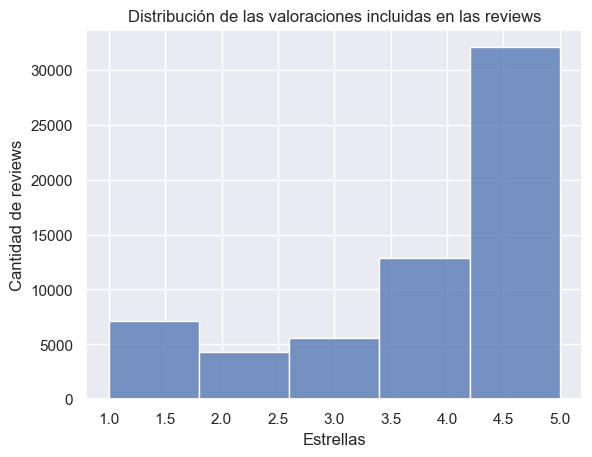

In [18]:
sns.histplot(data = yelp_latin_reviews, x = "stars", stat="count", bins = 5)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Estrellas')
plt.title('Distribución de las valoraciones incluidas en las reviews')
plt.show()

Como podemos observar, **casi la mitad de las reviews** fueron **muy positivas**, ya que superan las 4 estrellas.

Por último, exportamos el archivo filtrado en formato parquet:

In [19]:
# Se exporta el archivo con las reviews de restaurantes latinos en formato parquet:
yelp_latin_reviews.to_parquet("Reviews_Yelp.parquet")